# Introduction
This notebook loads in analysis of Fresk 68K PBMC's from a healthy donor and analyzed on the 10X Genomics platform. Data was downloaded from the 10X website (https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/fresh_68k_pbmc_donor_a). Instructions on using the ``matrix.mtx`` files are included here: https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/output/matrices. We will follow this tutorial

In [39]:
# import necessary packages
import csv
import os
import scipy.io
import pandas
import matplotlib.pylab as plt
import numpy as np
import scipy.sparse

In [2]:
# set paths
genome = "hg19"
matrices_dir = "../scrnaseq_10x/filtered_matrices_mex/"
clustering_dir = "../scrnaseq_10x/analysis_csv/"
human_matrix_dir = os.path.join(matrices_dir, genome)
pca_dir = os.path.join(clustering_dir,"pca")
tsne_dir = os.path.join(clustering_dir,"tsne")
kmeans_dir = os.path.join(clustering_dir,"kmeans")

In [3]:
# load the matrix of human data
mat = scipy.io.mmread(os.path.join(human_matrix_dir, "matrix.mtx")) 
mat.shape
#note: mat is now a 'coo_matrix'
# each row is a gene
# each column is a cell

(32738, 68579)

In [4]:
# load the gene IDs and names
genes_path = os.path.join(human_matrix_dir, "genes.tsv")
gene_ids = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
gene_names = [row[1] for row in csv.reader(open(genes_path), delimiter="\t")]

In [5]:
# load the barcode IDs
barcodes_path = os.path.join(human_matrix_dir, "barcodes.tsv")
barcodes = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]

In [6]:
genes_df = pandas.DataFrame()
genes_df = genes_df.assign(genename=pandas.Series(gene_names),geneid=pandas.Series(gene_ids))

In [ ]:
# for multi-core jobs
# https://stackoverflow.com/questions/33480675/multiprocessing-on-a-set-number-of-cores

We now load T-SNE metadata for this population. We will show what the populations look like and then isolate the cells responsible to generate co-expression blocks

In [7]:
#tsne_data = scipy.io.mmread(os.path.join(tsne_dir, "projection.csv")) 
tsne_data = os.path.join(tsne_dir, "projection.csv")
tsne_points = [row for row in csv.reader(open(tsne_data), delimiter=",")]
tsne_meta = pandas.DataFrame(tsne_points[1:])
tsne_meta.columns = tsne_points[0]

In [8]:
#import clustering
cluster_10 = os.path.join(kmeans_dir,"10_clusters")
print(cluster_10)
#get the cluster designations
cluster_10_ids = pandas.read_csv(os.path.join(cluster_10,"clusters.csv"))
cluster_10_ids
#kmeans_10 = os.path.join(pca_dir,"10_clusters") 

../scrnaseq_10x/analysis_csv/kmeans/10_clusters


,Barcode,Cluster
0,AAACATACACCCAA-1,2
1,AAACATACCCCTCA-1,3
2,AAACATACTAACCG-1,6
3,AAACATACTCTTCA-1,3
4,AAACATACTGTCTT-1,2
5,AAACATACTTCTAC-1,2
6,AAACATTGCTTCGC-1,7
7,AAACCGTGCCCAAA-1,2
8,AAACCGTGCGATAC-1,2
9,AAACCGTGTACAGC-1,2


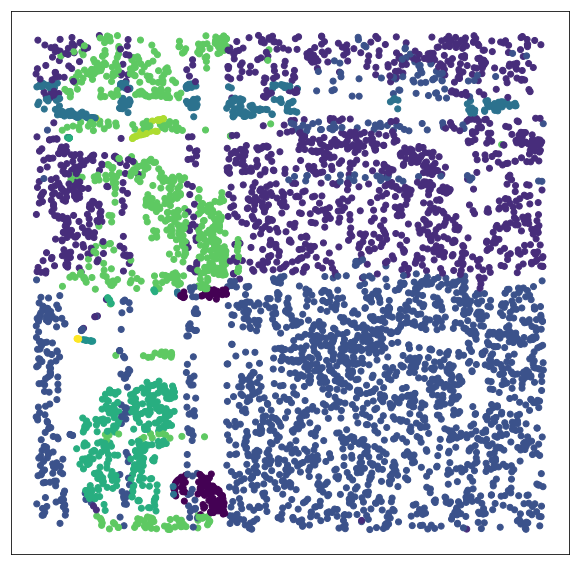

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_meta.iloc[0:5000,1],tsne_meta.iloc[0:5000,2],c = cluster_10_ids.iloc[0:5000,1])
plt.xticks([])
plt.yticks([])

plt.show()

# Isolate groups of cells
Now, we want to identify putative groups of cells (from the 10-cluster scheme) and calculate co-expression matrices fo the genes using measurements from each cluster of cells (we will have as any matrices as we have cells). We will calculate these co-expression matrices for the whole set of ~30,000 genes and represent it as a plot. 

In [10]:
clusters = set(cluster_10_ids.iloc[:,1])
cellgroups = [None for i in clusters]
for i in clusters:
    cells = cluster_10_ids[cluster_10_ids.Cluster == i] #get the cells in the cluster "i"
    cells_ind = cells.index
    mat_csr = mat.tocsr()
    cellgroups[i-1] = mat_csr[:,cells_ind.tolist()] #cells_ind  

In [18]:
#from https://stackoverflow.com/questions/19231268/correlation-coefficients-for-sparse-matrix-in-python
def sparse_corrcoef(A, B=None):

    if B is not None:
        A = sparse.vstack((A, B), format='csr')

    A = A.astype(np.float64)
    n = A.shape[1]
    print(n)

    # Compute the covariance matrix
    rowsum = A.sum(1)
    centering = rowsum.dot(rowsum.T.conjugate()) / n
    C = (A.dot(A.T.conjugate()) - centering) / (n - 1)

    # The correlation coefficients are given by
    # C_{i,j} / sqrt(C_{i} * C_{j})
    d = np.diag(C)
    coeffs = C / np.sqrt(np.outer(d, d))

    return coeffs

In [12]:
print(cellgroups.shape)

AttributeError: 'list' object has no attribute 'shape'

In [13]:
for i in cellgroups:
    print(i.shape)
#cellgroups[4]
#mat_csr = mat.tocsr()
#mat_csr[2,cellgroups[0].tolist()]
#    mat_group = mat.tocsc[0:100] cells_ind

(32738, 963)
(32738, 11716)
(32738, 17068)
(32738, 1768)
(32738, 75)
(32738, 2282)
(32738, 5900)
(32738, 202)
(32738, 25)
(32738, 1)


In [19]:
test_corr = sparse_corrcoef(A=cellgroups[4])

25


/Users/vinayakvsv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [25]:
test_corr_nona = np.nan_to_num(test_corr) #replace all NA with 0

In [40]:
print(np.amax(np.sum(a=test_corr_nona,axis=0))) #so this does work
test_corr_nona_sparse = scipy.sparse.coo_matrix(test_corr_nona) #store as a sparce matrix

974.11640493


In [41]:
#import cooler
test_corr_nona_sparse.todense()

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

The clustering analysis turned out differentially-expressed genes for each cluster, so we could calculate a co-expression matrix using just those genes (rather than those with no counts recorded). Nevertheless, now we can perform matrix operations on the coo_matrix to identify the "blocks" of co-expressed genes.

This is a job for "block modelling." https://stats.stackexchange.com/questions/138325/clustering-a-correlation-matrix 

In [44]:
#how do we efficiently identify blocks? Bin the genome into 100 kb blocks and calculate correlations between genes within them?

#first, let's get a distribution of correlation values:
n, bins, patches = plt.hist(test_corr_nona[0:100][0:100])
plt.show()


KeyboardInterrupt: 